### Principal Component Analysis:
It is often very difficut to work with high dimensional data in machine learning. It increases complexity and also
requires high compute time. Sometime most of the information content can be derived across most informant dimension
of the data. PCA is a most popular technique to identfy these dimension over which most of the information content
is preserved reducing high dimensional data into lower dimension. In some context, PCA also helps to identify collinear model components.
PCA breaks high dimensional data into set of orthogonal dimensions. These dimensions can explain most of the variance in the dataset. PCA identifies axis of greatest variance in the dataset (principal component).
PCA does following steps:
   1. Identify center point of the dataset.
   2. Identify co-variance matrix of the data.
   3. Calculate the eigenvectors of the co-variance matrix.
   4. Orthonormalizing the eigenvectors.
   5. Calculate the proportion of the variance presented by each eigenvectors.

In [2]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.cm as cm

digits = load_digits()
data = digits.data

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

In [4]:
pca = PCA(n_components=10)
data_r = pca.fit(data).transform(data)

print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))
print('sum of explained variance (first two components): %s' % str(sum(pca.explained_variance_ratio_)))

explained variance ratio (first two components): [0.14890594 0.13618771 0.11794594 0.08409979 0.05782414 0.0491691
 0.04315983 0.03661361 0.03353243 0.03078563]
sum of explained variance (first two components): 0.7382241172465693


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


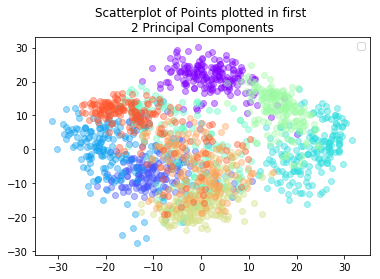

In [11]:
x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]

plt.figure()
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for c, i, target_name in zip(colors, [0,2,3,4,5,6,7,8,9], labels):
    plt.scatter(data_r[labels == i, 0], data_r[labels == i, 1], c=c, alpha = 0.4)
    plt.legend()
    plt.title('Scatterplot of Points plotted in first \n'
    '2 Principal Components')

This plot shows us that, while there is some separation between classes in the first two principal components, it may be tricky to classify highly accurately with this dataset. However, classes do appear to be clustered and we may be able to get reasonably good results by employing a clustering analysis. In this way, PCA has given us some insight into how the dataset is structured and has informed our subsequent analysis.

### K-Means Clustering

Clustering is probably the archetypal unsupervised learning technique for several reasons.
The most popular clustering algorithm is k-means; this algorithm forms k-many clusters by first randomly initiating the clusters as k-many points in the data space. Each of these points is the mean of a cluster. 
An iterative process then occurs, running as follows:

1. Each point is assigned to a cluster based on the least (within cluster) sum of squares, which is intuitively the nearest mean.
2. The center (centroid) of each cluster becomes the new mean. This causes each of the means to shift.

Over enough iterations, the centroids move into positions that minimize a performance metric (the performance metric most commonly used is the "within cluster least sum of squares" measure).
Once this measure is minimized, observations are no longer reassigned during iteration; at this point the algorithm has converged on a solution.

In [21]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed()

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(73 * '_')
print('% 9s' % 'init'
      '         time   inertia   homo   compl   v-meas   ARI     silhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

n_digits: 10, 	 n_samples 1797, 	 n_features 64
_________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI     silhouette


## Accuracy for K-Means clustering
#### The homogeneity score:
is a simple, zero-to-one-bounded measure of the degree to which clusters contain only assignments of a given class. A score of one indicates that all clusters contain measurements from a single class. This measure is complimented by the completeness score, which is a similarly bounded measure of the extent to which all members of a given class are assigned to the same cluster. As such, a completeness score and homogeneity score of one indicates a perfect clustering solution.

##### The validity measure (v-measure):
is a harmonic mean of the homogeneity and completeness scores, which is exactly analogous to the F-measure for binary classification. In essence, it provides a single, 0-1-scaled value to monitor both homogeneity and completeness.

#### The Adjusted Rand Index (ARI):
is a similarity measure that tracks the consensus between sets of assignments. As applied to clustering, it measures the consensus between the true, pre-existing observation labels and the labels predicted as an output of the clustering algorithm. The Rand index measures labeling similarity on a 0-1 bound scale, with one equaling perfect prediction labels.

One option to measure the performance of a k-means clustering solution without labeled data is the Silhouette Coefficient. This is a measure of how well-defined the clusters within a model are. The Silhouette Coefficient for a given dataset is the mean of the coefficient for each sample, where this coefficient is calculated as follows:

s = (b-a)/max(a,b)

The definitions of each term are as follows:

a: The mean distance between a sample and all other points in the same cluster

b: The mean distance between a sample and all other points in the next nearest cluster

This score is bounded between -1 and 1, with -1 indicating incorrect clustering, 1 indicating very dense clustering, and scores around 0 indicating overlapping clusters. This tends to fit our expectations of how a good clustering solution is composed.

In [10]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [22]:
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

k-means++   0.26s    69662   0.681   0.720   0.700   0.571    0.164


In [23]:
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

   random   0.24s    69674   0.680   0.719   0.698   0.570    0.123


In [12]:
digits = load_digits()
data = scale(digits.data)

In [13]:
#we will also apply PCA to reduce dimensions
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=10),
name="PCA-based",
data=data) 

PCA-based   0.04s    70791   0.667   0.695   0.680   0.554    0.148


/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


### The complete code

n_digits: 10, 	 n_samples 1797, 	 n_features 64
_________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI     silhouette
PCA-based   0.03s    70769   0.669   0.696   0.682   0.558    0.131
_________________________________________________________________________


/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


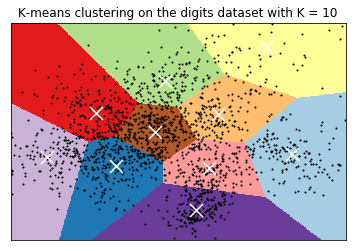

In [26]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed()

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(73 * '_')
print('% 9s' % 'init'
      '         time   inertia   homo   compl   v-meas   ARI     silhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 50

pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=10),
              name="PCA-based",
              data=data)
print(73 * '_')

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

h = .03     # point in the mesh [x_min, m_max]x[y_min, y_max].

x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 3
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset with K = 10')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

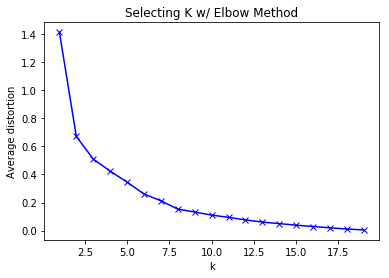

In [27]:
#This was for k = 10 but in practice we need to tune number of clusters K and 
# in bellow we see performance for different values of K
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

cluster1 = np.random.uniform(0.1, 1.5, (2, 10))
cluster2 = np.random.uniform(4.2, 1.9, (2,10))
X = np.hstack((cluster1, cluster2)).T

K = range(1, 20)
meandistortions = []
for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis = 1))/ X.shape[0])
        
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting K w/ Elbow Method')
plt.show()

### Using cross validation to fight overfitting

In [28]:
import numpy as np
from sklearn import cross_validation
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale


digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=n_digits)
cv = cross_validation.ShuffleSplit(n_samples, n_iter = 10, test_size = 0.4, random_state = 0)
scores = cross_validation.cross_val_score(kmeans, data, labels, cv = cv, scoring = 'adjusted_rand_score')
print(scores)
print(sum(scores)/cv.n_iter)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0.35370519 0.49676152 0.44319379 0.51400716 0.43652971 0.46410787
 0.39916968 0.58529362 0.46925475 0.36700063]
0.45290239188587583


This output gives us, in order, the adjusted Rand score for cross-validated, k-means++ clustering performed across each of the 10 folds in order. We can see that results do fluctuate between around 0.4 and 0.55; the earlier ARI score for k-means++ without PCA fell within this range (at 0.465). What we've created, then, is code that we can incorporate into our analysis in order to check the quality of our clustering automatically on an ongoing basis.

As noted earlier in this chapter, your choice of success measure is contingent on what information you already have. In most cases, you won't have access to ground truth labels from a dataset and will be obliged to use a measure such as the Silhouette Coefficient that we discussed previously.